In [2]:
#problem 1  
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def compact_svd(A,tol):
    AH =A.conj().T
    eigs,vecs = scipy.linalg.eig(AH@A)
#     print(vecs)
    sigma = np.sqrt(eigs)
    indices = np.argsort(-sigma) # now the sorting will be reverse
    sigmasorted = sigma[indices] # since the indices are returned from sorting 
    vecsorted = np.empty((np.shape(vecs)))
    for count, value in enumerate(indices):
        vecsorted[:,count] = vecs[:,value]
    sigma = sigmasorted
    vecs = vecsorted
    r = np.count_nonzero(sigma)
    sigma1 = sigma[:r]
    V1 = vecs[:,:r]
    row,column = np.shape(V1)
    U1 = np.zeros((row,column))
    for i in range(column):
          U1[:,i] = (1/sigma1[i])*np.asarray((np.matrix(A)@(np.matrix(V1[:,i]).T))).reshape(-1)
    return U1,sigma1,V1.conj().T

A = np.random.random((5,5))
tol = 10**(-12)
U1,sigma1,VH = compact_svd(A,tol)

print('Whether U is orthonormal holds: ', np.allclose((U1.T)@U1, np.identity(5)))
print('Whether U*sigma*VH=A holds: ', np.allclose(U1@np.diag(sigma1)@VH,A))
print('Whether rank is correct: ', np.linalg.matrix_rank(A)==len(sigma1))
        
        

Whether U is orthonormal holds:  True
Whether U*sigma*VH=A holds:  True
Whether rank is correct:  True


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


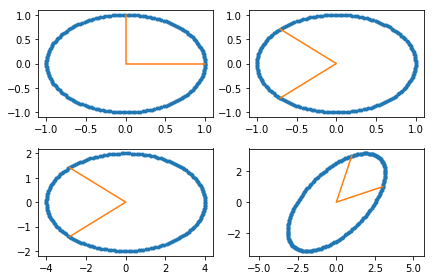

In [7]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def func(A):
    theta=np.linspace(0,2*np.pi,200)
    x=np.cos(theta)
    y=np.sin(theta)
    E=np.array([1,0,0,0,0,1]).reshape(2,3)
    S=np.empty((2,len(y)))
    S[0,:]=x
    S[1,:]=y
    fig,ax=plt.subplots(2,2)
    ax[0,0].plot(S[0,:], S[1,:], '.')
    ax[0,0].plot(E[0,:], E[1,:], '-')
    U,sigma,VH=scipy.linalg.svd(A, full_matrices=True)
    sigma=sigma*np.eye(2)
    VHS=VH@S
    VHE=VH@E
    ax[0,1].plot(VHS[0,:], VHS[1,:], '.')
    ax[0,1].plot(VHE[0,:], VHE[1,:], '-')
    sigmaVHS=sigma@VH@S
    sigmaVHE=sigma@VH@E
    ax[1,0].plot(sigmaVHS[0,:], sigmaVHS[1,:], '.')
    ax[1,0].plot(sigmaVHE[0,:], sigmaVHE[1,:], '-')
    UsigmaVHS=U@sigma@VH@S
    UsigmaVHE=U@sigma@VH@E
    ax[1,1].plot(UsigmaVHS[0,:], UsigmaVHS[1,:], '.')
    ax[1,1].plot(UsigmaVHE[0,:], UsigmaVHE[1,:], '-')
    plt.axis("equal")
    plt.tight_layout()
    return plt.show()
    
    

A=np.array([3,1,1,3]).reshape(2,2)
func(A)
   






In [8]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def approximation(A,s):
    U,sigma,VH=scipy.linalg.svd(A, full_matrices=False)
    U_hat=U[:,:s]
    sigma_hat=sigma[:s]*np.eye(len(sigma[:s]))
    VH_hat=VH[:s, :]
    A_hat=U_hat@sigma_hat@VH_hat
    return U_hat, sigma_hat, VH_hat

A=np.random.random((20,20))
s=4
U_hat, sigma_hat, VH_hat=approximation(A,s)

size1=np.size(U_hat)
size2=np.size(VH_hat)
size3=np.size(np.diag(sigma_hat))
size=size1+size2+size3
print(size)
print('There is an error because s>rank(A): ', s>np.linalg.matrix_rank(A))


164
There is an error because s>rank(A):  False


In [9]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def func(A,epsilon):
    U,sigma,VH=scipy.linalg.svd(A, full_matrices=False)
    sigma=sigma[np.argsort(-sigma)]
    sigma_hat=sigma[np.where(sigma<epsilon)]
    sigma_hat=sigma_hat[:-1]
    sigma_hat=sigma_hat[:s]*np.eye(len(sigma_hat[:s]))
    U_hat=U[:,:s]
    VH_hat=VH[:s, :]
    A_hat=U_hat@sigma_hat@VH_hat
    return U_hat, sigma_hat, VH_hat

A=np.random.random((15,15))
U,sig,V=func(A,3)

size1=np.size(U)
size2=np.size(V)
size3=np.size(np.diag(sig))
size=size1+size2+size3
print(size)
print('There is an error because s>rank(A): ', s>np.linalg.matrix_rank(A))


124
There is an error because s>rank(A):  False


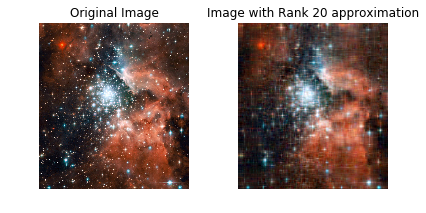

In [10]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def function(file,s):
    image=plt.imread(file)/255
    R=image[:,:,0]
    G=image[:,:,1]
    B=image[:,:,2]
    R_hat=approximation(R,s)
    R_hat=np.clip(R_hat, 0,1)
    G_hat=approximation(G,s)
    G_hat=np.clip(G_hat, 0,1)
    B_hat=approximation(B,s)
    B_hat=np.clip(B_hat, 0,1)
    image_hat=np.dstack((R_hat,G_hat,B_hat))
    plt.subplot(121)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(image_hat)
    plt.title('Image with Rank 20 approximation')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def approximation(A,s):
    U,sigma,VH=scipy.linalg.svd(A, full_matrices=False)
    U_hat=U[:,:s]
    sigma_hat=sigma[:s]*np.eye(len(sigma[:s]))
    VH_hat=VH[:s, :]
    A_hat=U_hat@sigma_hat@VH_hat
    return A_hat

function("hubble.jpg",20)    
